<a href="https://colab.research.google.com/github/RishankSoni/ES335-Prerequisite-Test/blob/main/ML_prerequisites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ES 335: Machine Learning Pre-requisite


Rishank Soni

23110277




In [ ]:
import numpy as np
import time
import random
import pandas as pd
import jax
import jax.numpy as jnp
import sympy as sp
import matplotlib.pyplot as plt


## Question 1



To multiply a matrix of size (n × k) with a matrix of size (k × m), the result is a matrix of size (n × m).

Each element in the resulting matrix is computed by taking the dot product of a row from the first matrix and a column from the second matrix. This requires:

* **k multiplications** and
* **(k - 1) additions** for each element.

Since there are **n × m** elements in the result, the total number of operations is:

* **n × m × k multiplications**
* **n × m × (k - 1) additions**






##Question 2

In [ ]:


def matrix_multiplication_list(m1,m2):
    n,k1 = len(m1),len(m1[0])
    k2,m = len(m2), len(m2[0])
    if k1!=k2:
        return "Invalid dimensions"
    ans = [[0 for i in range(m)] for j in range(n)]
    for i in range(n):
        for j in range(m):
            for k in range(k1):
                ans[i][j] += m1[i][k]*m2[k][j]
    return ans

def matrix_multiplication_numpy(m1,m2):
    return np.dot(m1,m2)




m1 = np.random.random(size=(100, 1000))
m2 = np.random.random(size=(1000, 3000))

start = time.time()
result_list = matrix_multiplication_list(m1.tolist(), m2.tolist())
end = time.time()
list_time = end - start

# Measure time for NumPy method
start = time.time()
result_numpy = matrix_multiplication_numpy(m1, m2)
end = time.time()
numpy_time = end - start

print(f"Time taken by list-of-lists method: {list_time:.6f} seconds")
print(f"Time taken by NumPy method: {numpy_time:.6f} seconds")

if numpy_time < list_time:
    print("NumPy multiplication is faster.")
else:
    print("List-of-lists multiplication is faster.")




Time taken by list-of-lists method: 77.979643 seconds
Time taken by NumPy method: 0.026663 seconds
NumPy multiplication is faster.


NumPy multiplies matrices faster than using lists of lists because NumPy arrays are optimized for mathematical operations. These operations are implemented in C, which is a low-level, compiled language. As a result, they run much faster compared to Python loops, which are interpreted and slower.

## Question 3


The time complexity of finding the median using this method is O(n²).

In [ ]:

# Naive approch
def kth_smallest(arr, k):
    arr_copy = arr.copy()
    for _ in range(k + 1):
        min_val = float('inf')
        min_index = -1
        for i in range(len(arr_copy)):
            if arr_copy[i] < min_val:
                min_val = arr_copy[i]
                min_index = i
        if min_index != -1:
            arr_copy[min_index] = float('inf')
    return min_val

def calculate_median(arr):
    n = len(arr)
    if n % 2 != 0:
        return kth_smallest(arr, n // 2)
    return (kth_smallest(arr, n // 2 - 1) + kth_smallest(arr, n // 2)) / 2


Sorting the array or using quick sort, both would O(nlog(n))

In [ ]:
def calculate_median_sort(arr):
  arrc=arr.copy()
  arrc.sort()
  n=len(arr)
  if n%2==0:
    return (arrc[n//2]+arrc[n//2-1])/2
  else:
    return arrc[n//2]

In [ ]:
def calculate_median_numpy(arr):
  return np.median(arr)

In [ ]:
arr = [np.random.randint(1, 100) for _ in range(10001)]

# Median using the looping method
start = time.time()
print(f"Median using manual loop method: {calculate_median(arr)}")
end = time.time()
loop_time = end - start

# Median using sorting
start = time.time()
print(f"Median using sorting method: {calculate_median_sort(arr)}")
end = time.time()
sort_time = end - start

# Median using NumPy's built-in function
start = time.time()
print(f"Median using NumPy: {calculate_median_numpy(arr)}")
end = time.time()
numpy_time = end - start

# Print timing comparisons
print(f"Time taken by manual loop method: {loop_time:.6f} seconds")
print(f"Time taken by sorting method:     {sort_time:.6f} seconds")
print(f"Time taken by NumPy method:       {numpy_time:.6f} seconds")


Median using manual loop method: 50
Median using sorting method: 50
Median using NumPy: 50.0
Time taken by manual loop method: 2.546432 seconds
Time taken by sorting method:     0.001442 seconds
Time taken by NumPy method:       0.001312 seconds


## Question 4

Given:
$$
f(x, y) = x^2 y + y^3 \sin(x)
$$
Partial derivative with respect to \(x\):  
$$
 \frac{\partial f}{\partial x} = 2xy + y^3 \cos(x)
$$
Partial derivative with respect to \(y\):  
$$
 \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x)
$$

## Question 5

In [ ]:




def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def manual_gradient(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return np.array([df_dx, df_dy])

grad_f = jax.grad(f, argnums=(0, 1))

# Generate 5 random (x, y) points in the range [0, 10)
points = np.random.rand(5, 2) * 10

# Compare gradients at each point
for x, y in points:
    jax_grad = grad_f(x, y)
    analytic_grad = manual_gradient(x, y)

    print(f"Point: (x = {x:.2f}, y = {y:.2f})")
    print(f"JAX gradient:   {jax_grad}")
    print(f"Analytical gradient: {analytic_grad}")
    print(f"Difference: dx = {np.abs(jax_grad[0] - analytic_grad[0]):.2e}, dy = {np.abs(jax_grad[1] - analytic_grad[1]):.2e}")
    print()


Point: (x = 3.81, y = 4.04)
JAX gradient:   (Array(-20.97332, dtype=float32), Array(-15.700248, dtype=float32))
Analytical gradient: [-20.97332  -15.700246]
Difference: dx = 0.00e+00, dy = 1.91e-06

Point: (x = 8.77, y = 2.82)
JAX gradient:   (Array(31.663872, dtype=float32), Array(91.442795, dtype=float32))
Analytical gradient: [31.663876 91.4428  ]
Difference: dx = 3.81e-06, dy = 7.63e-06

Point: (x = 6.23, y = 6.45)
JAX gradient:   (Array(348.1656, dtype=float32), Array(32.00921, dtype=float32))
Analytical gradient: [348.16556  32.00921]
Difference: dx = 3.05e-05, dy = 0.00e+00

Point: (x = 5.44, y = 1.70)
JAX gradient:   (Array(21.748055, dtype=float32), Array(23.08889, dtype=float32))
Analytical gradient: [21.748056 23.088894]
Difference: dx = 1.91e-06, dy = 3.81e-06

Point: (x = 9.17, y = 5.96)
JAX gradient:   (Array(-95.37191, dtype=float32), Array(111.3295, dtype=float32))
Analytical gradient: [-95.37192 111.32951]
Difference: dx = 7.63e-06, dy = 1.53e-05



## Question 6

In [ ]:

x, y = sp.symbols('x y')
f = x * x * y + y * y * y * sp.sin(x)

grad_x = sp.diff(f, x)
grad_y = sp.diff(f, y)

display("df/dx =", grad_x)
display("df/dy =", grad_y)

'df/dx ='

2*x*y + y**3*cos(x)

'df/dy ='

x**2 + 3*y**2*sin(x)

## Question 7

In [ ]:
d = {
    2022: {
        "Branch1": {
            "student1": {
                "roll_no": 1,
                "name": "name1",
                "marks": {
                    "maths": 100,
                    "english": 70
                }
            },
            "student2": {
                "roll_no": 2,
                "name": "name2",
                "marks": {
                    "maths": 100,
                    "english": 70
                }
            }
        },
        "Branch2": {
            "student3": {
                "roll_no": 3,
                "name": "name3",
                "marks": {
                    "maths": 100,
                    "english": 70
                }
            },
            "student4": {
                "roll_no": 4,
                "name": "name4",
                "marks": {
                    "maths": 100,
                    "english": 70
                }
            }
        }
    },
    2023: {
        "Computer Science": {},
        "Electrical": {}
    },
    2024: {
        "Computer Science": {},
        "Electrical": {}
    },
    2025: {
        "Computer Science": {},
        "Electrical": {}
    }
}


In [ ]:
print(d)

{2022: {'Branch1': {'student1': {'roll_no': 1, 'name': 'name1', 'marks': {'maths': 100, 'english': 70}}, 'student2': {'roll_no': 2, 'name': 'name2', 'marks': {'maths': 100, 'english': 70}}}, 'Branch2': {'student3': {'roll_no': 3, 'name': 'name3', 'marks': {'maths': 100, 'english': 70}}, 'student4': {'roll_no': 4, 'name': 'name4', 'marks': {'maths': 100, 'english': 70}}}}, 2023: {'Computer Science': {}, 'Electrical': {}}, 2024: {'Computer Science': {}, 'Electrical': {}}, 2025: {'Computer Science': {}, 'Electrical': {}}}


## Question 8

In [ ]:
class University:
    def __init__(self):
        self.sessions = [Session(year) for year in range(2022, 2026)]

    def __repr__(self):
        output = ""
        for session in self.sessions:
            output += str(session) + "\n"
        return output

class Session:
    def __init__(self, year):
        self.year = year
        self.departments = []

    def __repr__(self):
        output = f"Session Year: {self.year}\n"
        for department in self.departments:
            output += str(department) + "\n"
        return output

class Department:
    def __init__(self, dept_name):
        self.dept_name = dept_name
        self.students = []

    def __repr__(self):
        output = f"Department: {self.dept_name}\n"
        for student in self.students:
            output += str(student) + "\n"
        return output

class Student:
    def __init__(self, name, roll_no, subjects):
        self.name = name
        self.roll_no = roll_no
        self.subjects = subjects

    def __repr__(self):
        return f"Student: {self.name}, Roll No: {self.roll_no}, Scores: {self.subjects}"

univ = University()
univ.sessions[0].departments.append(Department("CSE"))
univ.sessions[0].departments.append(Department("ECE"))
univ.sessions[0].departments[1].students.append(Student("Rishank", 3, {"Math": 100, "English": 72, "Science": 87}))

print(univ)


Session Year: 2022
Department: CSE

Department: ECE
Student: Rishank, Roll No: 3, Scores: {'Math': 100, 'English': 72, 'Science': 87}


Session Year: 2023

Session Year: 2024

Session Year: 2025




## Question 9

In [ ]:

def plot_fn(f):
    x = np.arange(0.5, 100.5, 0.5)
    y = f(x)
    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

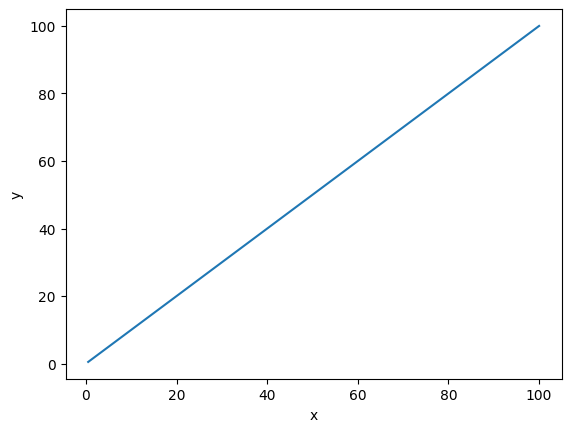

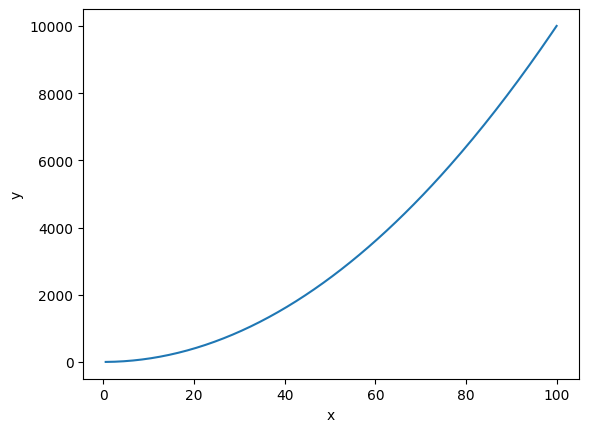

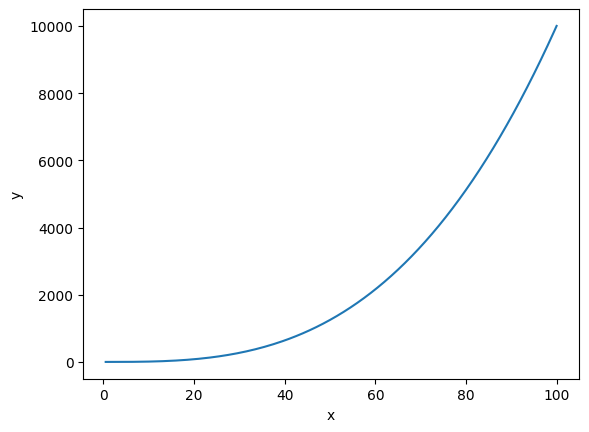

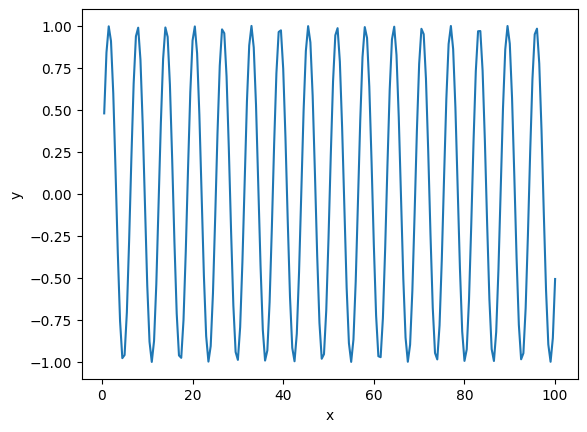

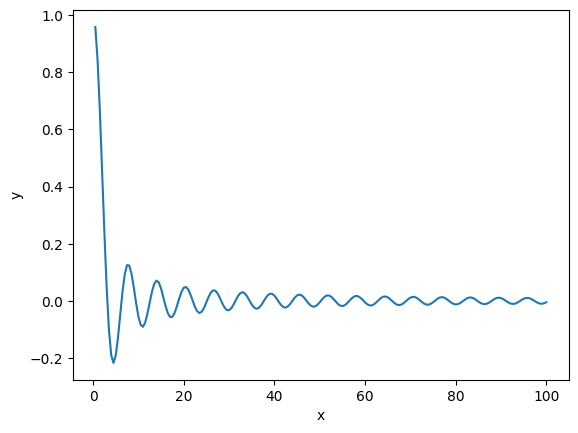

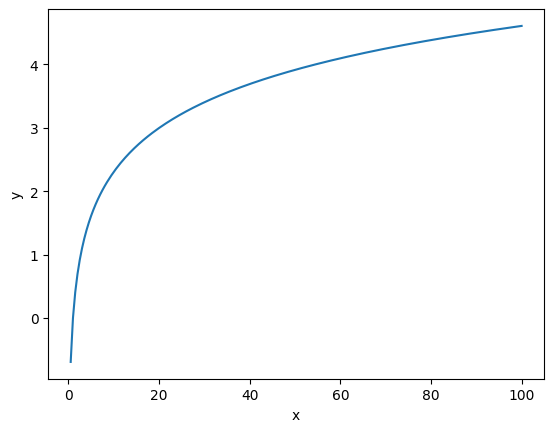

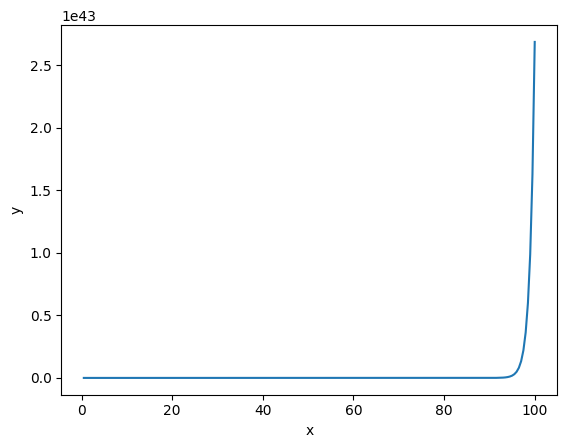

In [ ]:

plot_fn(lambda x: x)
plot_fn(lambda x: x * x)
plot_fn(lambda x: x ** 3 / 100)
plot_fn(lambda x: np.sin(x))
plot_fn(lambda x: np.sin(x) / x)
plot_fn(lambda x: np.log(x))
plot_fn(lambda x: np.exp(x))

## Question 10

In [ ]:

#Generate a 20x5 matrix with random numbers from a uniform distribution in [1, 2)
matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame and name the columns 'a' to 'e'
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])

#Find the column with the highest standard deviation
column_with_max_std = df.std().idxmax()

#Find the row with the lowest mean
row_with_min_mean = df.mean(axis=1).idxmin()

# Display results
print("Column with the highest standard deviation:", column_with_max_std)
print("Row with the lowest mean:", row_with_min_mean)


Column with the highest standard deviation: a
Row with the lowest mean: 2


## Question 11

In [ ]:


# Create a DataFrame with random values between 1 and 2
A = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(A, columns=['a', 'b', 'c', 'd', 'e'])

# Add column 'f' as the sum of columns a to e
df['f'] = df.sum(axis=1)

# Add column 'g' based on the value in 'f'
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Count rows where g == 'LT8'
lt8_count = (df['g'] == 'LT8').sum()

# Compute standard deviation of 'f' for each group
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()

# Display results
print(f"Number of rows with g == 'LT8': {lt8_count}")
print(f"Standard deviation of 'f' for LT8 group: {std_lt8:.4f}")
print(f"Standard deviation of 'f' for GT8 group: {std_gt8:.4f}")

display(df)


Number of rows with g == 'LT8': 18
Standard deviation of 'f' for LT8 group: 0.4331
Standard deviation of 'f' for GT8 group: 0.1114


,a,b,c,d,e,f,g
0,1.164392,1.039868,1.939318,1.052144,1.523065,6.718787,LT8
1,1.835975,1.894295,1.555878,1.601845,1.318262,8.206255,GT8
2,1.633111,1.919408,1.494082,1.509307,1.425979,7.981887,LT8
3,1.970563,1.614688,1.126126,1.494106,1.555363,7.760846,LT8
4,1.043133,1.390871,1.340745,1.050497,1.922566,6.747811,LT8
5,1.740366,1.493295,1.840256,1.068124,1.906627,8.048668,GT8
6,1.225128,1.942515,1.230504,1.512751,1.417149,7.328049,LT8
7,1.011441,1.419706,1.739542,1.799663,1.146720,7.117073,LT8
8,1.357328,1.816439,1.042319,1.059770,1.358824,6.634679,LT8
9,1.840197,1.384233,1.640609,1.537749,1.239334,7.642122,LT8


## Question 12

When two NumPy arrays with different shapes are added together, NumPy attempts to automatically adjust (or "broadcast") the shapes to make the operation possible. Below are some examples demonstrating it.

In [ ]:
print(np.array([10, 20, 30]) + np.array([1, 2, 3]).reshape(-1, 1))
print(np.array([5, 10, 15]) + np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
print(np.array([5, 10, 15]).reshape(-1, 1) + np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
print(100 + np.array([[1, 2, 3], [4, 5, 6]]))


[[11 21 31]
 [12 22 32]
 [13 23 33]]
[[ 6 12 18]
 [ 9 15 21]
 [12 18 24]]
[[ 6  7  8]
 [14 15 16]
 [22 23 24]]
[[101 102 103]
 [104 105 106]]


## Question 13

In [ ]:

def argmin(arr):
  min = np.inf
  index=None
  for i in range(len(arr)):
    if arr[i]<min:
      min=arr[i]
      index = i
  return index

def argmin_numpy(arr):
  return np.argmin(arr)

arr = np.random.random(20)
print(f"Array used = {arr}")
print(f"Argmin calculated by function = {argmin(arr)}")
print(f"Argmin calculated by np.argmin = {argmin_numpy(arr)}")

Array used = [0.38138405 0.11987629 0.86302233 0.68770012 0.12485174 0.55163712
 0.81784752 0.5116795  0.36775698 0.27885653 0.76033282 0.2012344
 0.71693872 0.52079515 0.79393791 0.42059186 0.5669466  0.65402068
 0.79617063 0.08843202]
Argmin calculated by function = 19
Argmin calculated by np.argmin = 19
